In [1]:
import math
import ctREFPROP.ctREFPROP as ct
import os
import numpy as np
import matplotlib.pyplot as plt

# Hack for my installation
os.environ['RPPREFIX'] = r'C:\\Program Files (x86)\REFPROP'

root = os.environ['RPPREFIX']
#r = ct.REFPROPFunctionLibrary(os.path.join(root, 'refprop.dll'))
r = ct.REFPROPFunctionLibrary(os.path.join(root, 'REFPRP64.dll'))
r.SETPATHdll(root)

In [2]:
fuel_type='ethane.FLD'
amb_type='nitrogen.FLD'
mix_list=fuel_type+"|"+amb_type
ierr, herr = r.GERG08dll(2,0)
if ierr !=0:
    raise ValueError(str(ierr) + ':' + herr)

r.FLAGSdll('GERG',1)
ierr, herr = r.SETUPdll(2,mix_list,'HMX.BNC','DEF')
if ierr !=0:
    raise ValueError(str(ierr) + ':' + herr)
    
#r.FLAGSdll('AGA8',0)
    

iUnits = 0 # in kPa
iMass = 0
iFlag = 1
T = 0
D = 0


dX = 0.01
xf = np.arange(0,1+dX,dX)
TempRange = np.arange(100,305,1)
satP = np.zeros(TempRange.size)
x=1
z=[x,(1-x)]
i=-1
for T in TempRange:
    i+=1
    satprops = r.SATTdll(T,z,2)
    satP[i] = satprops.P
    


CriT = np.zeros(xf.size)
CP_T = np.zeros(xf.size)
CriP = np.zeros(xf.size)
CP_P = np.zeros(xf.size)
CP_P_2 = np.zeros(xf.size)
CP_T_2 = np.zeros(xf.size)
CP_T_error = np.zeros(xf.size)
CP_P_error = np.zeros(xf.size)
CriTP = np.zeros(xf.size)
#ALL = r.MAXTdll(z)
i=-1


## MAXPdll good subroutine for finding max pressure along the saturation line


for x in xf:
    i+=1
    z=[x,(1-x)]
    CriticalProp = r.CRTPNTdll(z,0,0)
    if CriticalProp.ierr == 0:
        CP_T[i] = CriticalProp.Tc
        CP_P[i] = CriticalProp.Pc
    else: 
        CP_T_error[i] = CriticalProp.Tc
        CP_P_error[i] = CriticalProp.Pc
        CP_T[i] = None
        CP_P[i] = None

    #print("%i%s%i" % (i,'/',xf.size))


i=-1
for x in xf:
    i+=1
    z=[x,(1-x)]
    ierr, herr = r.SATSPLNdll(z)   
    ALL = r.ALLPROPSdll('TMAXT',iUnits,iMass,iFlag,T,D,z)
    SubALL = ALL[0]
    Cri = SubALL[0]
    CriT[i] = Cri
    ALL = r.ALLPROPSdll('PMAXT',iUnits,iMass,iFlag,T,D,z)
    SubALL = ALL[0]
    Cri = SubALL[0]
    CriTP[i] = Cri
    ALL = r.ALLPROPSdll('PMAXP',iUnits,iMass,iFlag,T,D,z)
    SubALL = ALL[0]
    Cri = SubALL[0]
    CriP[i] = Cri
    ALL = r.ALLPROPSdll('PCEST',iUnits,iMass,iFlag,T,D,z)
    SubALL = ALL[0]
    Crit = SubALL[0]
    CP_P_2[i] = Crit
    ALL = r.ALLPROPSdll('TCEST',iUnits,iMass,iFlag,T,D,z)
    SubALL = ALL[0]
    Crit = SubALL[0]
    CP_T_2[i] = Crit

## Figure 6

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


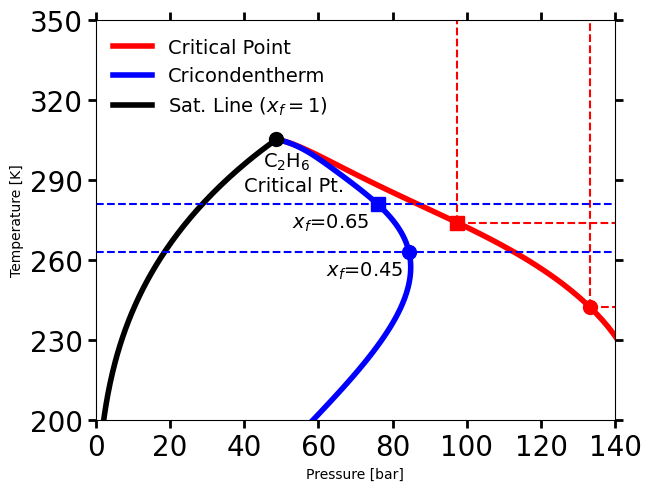

In [3]:

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

fig, ax = plt.subplots(constrained_layout=True)
plt.plot(CP_P/100,CP_T,'r',linewidth=4)
plt.plot(CriTP/100,CriT,'b',linewidth=4)
plt.plot(satP/100,TempRange,'k',linewidth=4)
plt.plot(CP_P[45]/100,CP_T[45],'ro',markersize=10)
plt.plot(CriTP[45]/100,CriT[45],'bo',markersize=10)
plt.plot(CP_P[65]/100,CP_T[65],'rs',markersize=10)
plt.plot(CriTP[65]/100,CriT[65],'bs',markersize=10)
plt.plot(CP_P[-1]/100,CP_T[-1],'ko',markersize=10)



## Make lines
vert1 = np.arange(CP_T[65],350+1,1)
hor1 = np.arange(CP_P[65]/100,140+1,1)
vert2 = np.arange(CP_T[45],350+1,1)
hor2 = np.arange(CP_P[45]/100,140+1,1)

vert3 = np.arange(CriT[65],350+1,1)
#hor3 = np.arange(CriTP[65]/100,140+1,1)
hor3 = np.arange(0,140+1,1)
vert4 = np.arange(CriT[45],350+1,1)
#hor4 = np.arange(CriTP[45]/100,140+1,1)
hor4 = np.arange(0,140+1,1)


plt.plot(hor1,np.ones(hor1.size)*CP_T[65],'r--',markersize=10)
plt.plot(np.ones(vert1.size)*CP_P[65]/100,vert1,'r--',markersize=10)
plt.plot(hor2,np.ones(hor2.size)*CP_T[45],'r--',markersize=10)
plt.plot(np.ones(vert2.size)*CP_P[45]/100,vert2,'r--',markersize=10)



#plt.plot(np.ones(vert3.size)*CriTP[65]/100,vert3,'b--',markersize=10)
#plt.plot(np.ones(vert4.size)*CriTP[43]/100,vert4,'b--',markersize=10)
plt.plot(hor3,np.ones(hor3.size)*CriT[65],'b--',markersize=10)
plt.plot(hor4,np.ones(hor4.size)*CriT[45],'b--',markersize=10)


plt.xticks(fontsize=BIGGER_SIZE)
plt.yticks(fontsize=BIGGER_SIZE)
plt.xlabel('Pressure [bar]')
plt.ylabel('Temperature [K]')
#plt.legend(['Boiling Line','Cricondentherm'])
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
font = {'family' : 'normal',
        'weight' : 'normal'}
ax.tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5,right='bool',top='bool')
plt.rc('font', **font)
plt.legend(['Critical Point','Cricondentherm', 'Sat. Line ($x_f=1$)'],fontsize=MEDIUM_SIZE,frameon=False,loc='upper left')
#plt.annotate('Boiling Line',fontsize=SMALL_SIZE, xy=(25,275), xytext=(45,277),
 #           arrowprops=dict(facecolor='black', shrink=0.05))
#plt.text(30,255,'Vapor-Liquid Equilbruim',fontsize=SMALL_SIZE, color='k')
#plt.text(55,247,'Region',fontsize=SMALL_SIZE, color='k')
#plt.text(5,265,'Superheated',fontsize=SMALL_SIZE, color='k',rotation=60)
#plt.text(15,272,'Vapor',fontsize=SMALL_SIZE, color='k',rotation=60)
#plt.text(93,300,'Supercritical',fontsize=SMALL_SIZE, color='k')
#plt.text(100,290,'Region',fontsize=SMALL_SIZE, color='k')
#plt.text(40,320,'C$_2$H$_6$',fontsize=SMALL_SIZE, color='k')
#plt.text(40,310,'Critical Pt.',fontsize=SMALL_SIZE, color='k')
plt.text(62,254,'$x_f$=0.45',fontsize=SMALL_SIZE, color='k')
plt.text(53,272,'$x_f$=0.65',fontsize=SMALL_SIZE, color='k')
plt.text(45,295,'C$_2$H$_6$',fontsize=SMALL_SIZE, color='k')
plt.text(40,286,'Critical Pt.',fontsize=SMALL_SIZE, color='k')
ax.set_yticks(np.linspace(200, 350, 6))
plt.ylim([200, 350])
plt.xlim([0, 140])
plt.show()


In [62]:
image_format = 'png' # e.g .png, .svg, etc.
image_name = 'Critical_line_Yang_Revised.png'

fig.savefig(image_name, format=image_format, dpi=1200)

In [4]:
DATALOAD = np.loadtxt('Ethane_Sat_data', delimiter=',')
Psweep = np.zeros(891)
T_sat_L = np.zeros(891)
T_sat_V = np.zeros(891)
for i in range(891):
    DATA = DATALOAD[i]
    Psweep[i] = DATA[0]
    T_sat_L[i] = DATA[1]
    T_sat_V[i] = DATA[2]

In [5]:
import pickle
  
# Create a variable
  
# Open a file and use dump()
with open('CriTP.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(CriTP, file)

# Open a file and use dump()
with open('CriT.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(CriT, file)

# Open a file and use dump()
with open('satP.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(satP, file)

    # Open a file and use dump()
with open('TempRange.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(TempRange, file)
    

## Figure 7

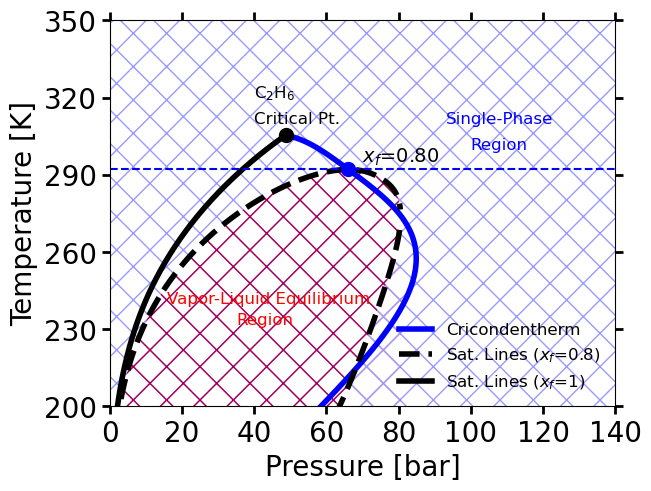

In [57]:
import matplotlib as mpl

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 20

fig, ax = plt.subplots(constrained_layout=True)
plt.plot(CriTP/100,CriT,'b',linewidth=4)
plt.plot(Psweep,T_sat_V,'k--',linewidth=4)
plt.plot(satP/100,TempRange,'k',linewidth=4)
plt.plot(Psweep,T_sat_L,'k--',linewidth=4)
plt.plot(CriTP[80]/100,CriT[80],'bo',markersize=10)
#plt.plot(80.5,274,'bo',markersize=10)

plt.plot(CP_P[-1]/100,CP_T[-1],'ko',markersize=10)



## Make lines


vert4 = np.arange(CriT[80],350+1,1)
vert5 = np.arange(0,CriT[80],1)
#hor4 = np.arange(CriTP[-1]/100,140+1,1)
hor4 = np.arange(0,80.5,1)
hor5 = np.arange(0,150,1)



#plt.plot(np.ones(vert4.size)*CriTP[80]/100,vert4,'b--',markersize=10)
#plt.plot(np.ones(vert5.size)*80.5,vert5,'r--',markersize=10) # this plots the cricondenbar line
#plt.plot(hor4,np.ones(hor4.size)*CriT[80],'r--',markersize=10)
plt.fill_between(Psweep,T_sat_V,color="none", hatch="X", edgecolor="r", linewidth=0.0,alpha=1)
plt.fill_between(Psweep,T_sat_L,color="none", hatch="X", edgecolor="w",linewidth=0.0,alpha=1)
plt.fill_between(Psweep,T_sat_L,color="none", hatch="X", edgecolor="w",linewidth=0.0,alpha=1)
plt.fill_between([0,150,150,0],[0,0,360,360],color="none", hatch="X", edgecolor="b", linewidth=0.0,alpha=0.4)

plt.plot(hor5,np.ones(hor5.size)*CriT[80],'b--',markersize=10)

plt.xticks(fontsize=BIGGER_SIZE)
plt.yticks(fontsize=BIGGER_SIZE)
plt.xlabel('Pressure [bar]')
plt.ylabel('Temperature [K]')
#plt.legend(['Boiling Line','Cricondentherm'])
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
font = {'family' : 'normal',
        'weight' : 'normal'}
ax.tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5,right='bool',top='bool')
plt.rc('font', **font)

plt.text(16,240,'Vapor-Liquid Equilibrium',fontsize=SMALL_SIZE, color='r')
plt.text(35,232,'Region',fontsize=SMALL_SIZE, color='r')
plt.text(93,310,'Single-Phase',fontsize=SMALL_SIZE, color='b')
plt.text(100,300,'Region',fontsize=SMALL_SIZE, color='b')
plt.text(40,320,'C$_2$H$_6$',fontsize=SMALL_SIZE, color='k')
plt.text(40,310,'Critical Pt.',fontsize=SMALL_SIZE, color='k')
plt.text(70,295,'$x_f$=0.80',fontsize=14, color='k')
plt.legend(['Cricondentherm','Sat. Lines ($x_f$=0.8)','Sat. Lines ($x_f$=1)'],fontsize=MEDIUM_SIZE,frameon=False,loc='lower right')
ax.set_yticks(np.linspace(200, 350, 6))
plt.ylim([200, 350])
plt.xlim([0, 140])
plt.show()
